In [5]:
%matplotlib inline
import os
import os.path
import cv2
import glob
import pickle
import imutils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import numpy as np
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from keras.models import load_model

Using TensorFlow backend.


In [6]:
# Define folders names
INPUT_CAPTCHA_FOLDER = "generated_captcha_images"
OUTPUT_FOLDER = "extract_letter"

MODEL_FILENAME_CNN = "captcha_model_CNN.hdf5"
MODEL_FILENAME_MLP = "captcha_model_MLP.hdf5"
MODEL_LABELS_FILENAME = "model_labels.dat"

In [7]:
captcha_files = glob.glob(os.path.join(INPUT_CAPTCHA_FOLDER, "*"))
counts = {}

for (i, captcha_image) in enumerate(captcha_files):
    print("[information]: Processing {}/{}".format(i + 1, len(captcha_files)))

    filename = os.path.basename(captcha_image)
    captcha_text = os.path.splitext(filename)[0]
    image = cv2.imread(captcha_image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Add some extra padding
    gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

    # threshold the image (convert it to pure black and white)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # find the contours the image
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Hack for compatibility with different OpenCV versions
    contours = contours[0] if imutils.is_cv2() else contours[1]

    each_letter_region = []

    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)

        if w / h > 1.25:
            half_width = int(w / 2)
            each_letter_region.append((x, y, half_width, h))
            each_letter_region.append((x + half_width, y, half_width, h))
        else:
            each_letter_region.append((x, y, w, h))
    if len(each_letter_region) != 4:
        continue

    each_letter_region = sorted(each_letter_region, key=lambda x: x[0])
    for bounding_box, letter_text in zip(each_letter_region, captcha_text):
        # Grab the coordinates of the letter in the image
        x, y, w, h = bounding_box

        # Extract the letter from the original image with a 2-pixel margin around the edge
        letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

        # Get the folder to save the image
        save_path = os.path.join(OUTPUT_FOLDER, letter_text)

        # write the letter image to a file
        count = counts.get(letter_text, 1)
        p = os.path.join(save_path, "{}.png".format(str(count).zfill(6)))
        cv2.imwrite(p, letter_image)

        # increment the count for the current key
        counts[letter_text] = count + 1

[information]: Processing 1/9955
[information]: Processing 2/9955
[information]: Processing 3/9955
[information]: Processing 4/9955
[information]: Processing 5/9955
[information]: Processing 6/9955
[information]: Processing 7/9955
[information]: Processing 8/9955
[information]: Processing 9/9955
[information]: Processing 10/9955
[information]: Processing 11/9955
[information]: Processing 12/9955
[information]: Processing 13/9955
[information]: Processing 14/9955
[information]: Processing 15/9955
[information]: Processing 16/9955
[information]: Processing 17/9955
[information]: Processing 18/9955
[information]: Processing 19/9955
[information]: Processing 20/9955
[information]: Processing 21/9955
[information]: Processing 22/9955
[information]: Processing 23/9955
[information]: Processing 24/9955
[information]: Processing 25/9955
[information]: Processing 26/9955
[information]: Processing 27/9955
[information]: Processing 28/9955
[information]: Processing 29/9955
[information]: Processi

[information]: Processing 247/9955
[information]: Processing 248/9955
[information]: Processing 249/9955
[information]: Processing 250/9955
[information]: Processing 251/9955
[information]: Processing 252/9955
[information]: Processing 253/9955
[information]: Processing 254/9955
[information]: Processing 255/9955
[information]: Processing 256/9955
[information]: Processing 257/9955
[information]: Processing 258/9955
[information]: Processing 259/9955
[information]: Processing 260/9955
[information]: Processing 261/9955
[information]: Processing 262/9955
[information]: Processing 263/9955
[information]: Processing 264/9955
[information]: Processing 265/9955
[information]: Processing 266/9955
[information]: Processing 267/9955
[information]: Processing 268/9955
[information]: Processing 269/9955
[information]: Processing 270/9955
[information]: Processing 271/9955
[information]: Processing 272/9955
[information]: Processing 273/9955
[information]: Processing 274/9955
[information]: Proce

[information]: Processing 489/9955
[information]: Processing 490/9955
[information]: Processing 491/9955
[information]: Processing 492/9955
[information]: Processing 493/9955
[information]: Processing 494/9955
[information]: Processing 495/9955
[information]: Processing 496/9955
[information]: Processing 497/9955
[information]: Processing 498/9955
[information]: Processing 499/9955
[information]: Processing 500/9955
[information]: Processing 501/9955
[information]: Processing 502/9955
[information]: Processing 503/9955
[information]: Processing 504/9955
[information]: Processing 505/9955
[information]: Processing 506/9955
[information]: Processing 507/9955
[information]: Processing 508/9955
[information]: Processing 509/9955
[information]: Processing 510/9955
[information]: Processing 511/9955
[information]: Processing 512/9955
[information]: Processing 513/9955
[information]: Processing 514/9955
[information]: Processing 515/9955
[information]: Processing 516/9955
[information]: Proce

[information]: Processing 728/9955
[information]: Processing 729/9955
[information]: Processing 730/9955
[information]: Processing 731/9955
[information]: Processing 732/9955
[information]: Processing 733/9955
[information]: Processing 734/9955
[information]: Processing 735/9955
[information]: Processing 736/9955
[information]: Processing 737/9955
[information]: Processing 738/9955
[information]: Processing 739/9955
[information]: Processing 740/9955
[information]: Processing 741/9955
[information]: Processing 742/9955
[information]: Processing 743/9955
[information]: Processing 744/9955
[information]: Processing 745/9955
[information]: Processing 746/9955
[information]: Processing 747/9955
[information]: Processing 748/9955
[information]: Processing 749/9955
[information]: Processing 750/9955
[information]: Processing 751/9955
[information]: Processing 752/9955
[information]: Processing 753/9955
[information]: Processing 754/9955
[information]: Processing 755/9955
[information]: Proce

[information]: Processing 967/9955
[information]: Processing 968/9955
[information]: Processing 969/9955
[information]: Processing 970/9955
[information]: Processing 971/9955
[information]: Processing 972/9955
[information]: Processing 973/9955
[information]: Processing 974/9955
[information]: Processing 975/9955
[information]: Processing 976/9955
[information]: Processing 977/9955
[information]: Processing 978/9955
[information]: Processing 979/9955
[information]: Processing 980/9955
[information]: Processing 981/9955
[information]: Processing 982/9955
[information]: Processing 983/9955
[information]: Processing 984/9955
[information]: Processing 985/9955
[information]: Processing 986/9955
[information]: Processing 987/9955
[information]: Processing 988/9955
[information]: Processing 989/9955
[information]: Processing 990/9955
[information]: Processing 991/9955
[information]: Processing 992/9955
[information]: Processing 993/9955
[information]: Processing 994/9955
[information]: Proce

[information]: Processing 1199/9955
[information]: Processing 1200/9955
[information]: Processing 1201/9955
[information]: Processing 1202/9955
[information]: Processing 1203/9955
[information]: Processing 1204/9955
[information]: Processing 1205/9955
[information]: Processing 1206/9955
[information]: Processing 1207/9955
[information]: Processing 1208/9955
[information]: Processing 1209/9955
[information]: Processing 1210/9955
[information]: Processing 1211/9955
[information]: Processing 1212/9955
[information]: Processing 1213/9955
[information]: Processing 1214/9955
[information]: Processing 1215/9955
[information]: Processing 1216/9955
[information]: Processing 1217/9955
[information]: Processing 1218/9955
[information]: Processing 1219/9955
[information]: Processing 1220/9955
[information]: Processing 1221/9955
[information]: Processing 1222/9955
[information]: Processing 1223/9955
[information]: Processing 1224/9955
[information]: Processing 1225/9955
[information]: Processing 12

[information]: Processing 1428/9955
[information]: Processing 1429/9955
[information]: Processing 1430/9955
[information]: Processing 1431/9955
[information]: Processing 1432/9955
[information]: Processing 1433/9955
[information]: Processing 1434/9955
[information]: Processing 1435/9955
[information]: Processing 1436/9955
[information]: Processing 1437/9955
[information]: Processing 1438/9955
[information]: Processing 1439/9955
[information]: Processing 1440/9955
[information]: Processing 1441/9955
[information]: Processing 1442/9955
[information]: Processing 1443/9955
[information]: Processing 1444/9955
[information]: Processing 1445/9955
[information]: Processing 1446/9955
[information]: Processing 1447/9955
[information]: Processing 1448/9955
[information]: Processing 1449/9955
[information]: Processing 1450/9955
[information]: Processing 1451/9955
[information]: Processing 1452/9955
[information]: Processing 1453/9955
[information]: Processing 1454/9955
[information]: Processing 14

[information]: Processing 1656/9955
[information]: Processing 1657/9955
[information]: Processing 1658/9955
[information]: Processing 1659/9955
[information]: Processing 1660/9955
[information]: Processing 1661/9955
[information]: Processing 1662/9955
[information]: Processing 1663/9955
[information]: Processing 1664/9955
[information]: Processing 1665/9955
[information]: Processing 1666/9955
[information]: Processing 1667/9955
[information]: Processing 1668/9955
[information]: Processing 1669/9955
[information]: Processing 1670/9955
[information]: Processing 1671/9955
[information]: Processing 1672/9955
[information]: Processing 1673/9955
[information]: Processing 1674/9955
[information]: Processing 1675/9955
[information]: Processing 1676/9955
[information]: Processing 1677/9955
[information]: Processing 1678/9955
[information]: Processing 1679/9955
[information]: Processing 1680/9955
[information]: Processing 1681/9955
[information]: Processing 1682/9955
[information]: Processing 16

[information]: Processing 1890/9955
[information]: Processing 1891/9955
[information]: Processing 1892/9955
[information]: Processing 1893/9955
[information]: Processing 1894/9955
[information]: Processing 1895/9955
[information]: Processing 1896/9955
[information]: Processing 1897/9955
[information]: Processing 1898/9955
[information]: Processing 1899/9955
[information]: Processing 1900/9955
[information]: Processing 1901/9955
[information]: Processing 1902/9955
[information]: Processing 1903/9955
[information]: Processing 1904/9955
[information]: Processing 1905/9955
[information]: Processing 1906/9955
[information]: Processing 1907/9955
[information]: Processing 1908/9955
[information]: Processing 1909/9955
[information]: Processing 1910/9955
[information]: Processing 1911/9955
[information]: Processing 1912/9955
[information]: Processing 1913/9955
[information]: Processing 1914/9955
[information]: Processing 1915/9955
[information]: Processing 1916/9955
[information]: Processing 19

[information]: Processing 2119/9955
[information]: Processing 2120/9955
[information]: Processing 2121/9955
[information]: Processing 2122/9955
[information]: Processing 2123/9955
[information]: Processing 2124/9955
[information]: Processing 2125/9955
[information]: Processing 2126/9955
[information]: Processing 2127/9955
[information]: Processing 2128/9955
[information]: Processing 2129/9955
[information]: Processing 2130/9955
[information]: Processing 2131/9955
[information]: Processing 2132/9955
[information]: Processing 2133/9955
[information]: Processing 2134/9955
[information]: Processing 2135/9955
[information]: Processing 2136/9955
[information]: Processing 2137/9955
[information]: Processing 2138/9955
[information]: Processing 2139/9955
[information]: Processing 2140/9955
[information]: Processing 2141/9955
[information]: Processing 2142/9955
[information]: Processing 2143/9955
[information]: Processing 2144/9955
[information]: Processing 2145/9955
[information]: Processing 21

[information]: Processing 2347/9955
[information]: Processing 2348/9955
[information]: Processing 2349/9955
[information]: Processing 2350/9955
[information]: Processing 2351/9955
[information]: Processing 2352/9955
[information]: Processing 2353/9955
[information]: Processing 2354/9955
[information]: Processing 2355/9955
[information]: Processing 2356/9955
[information]: Processing 2357/9955
[information]: Processing 2358/9955
[information]: Processing 2359/9955
[information]: Processing 2360/9955
[information]: Processing 2361/9955
[information]: Processing 2362/9955
[information]: Processing 2363/9955
[information]: Processing 2364/9955
[information]: Processing 2365/9955
[information]: Processing 2366/9955
[information]: Processing 2367/9955
[information]: Processing 2368/9955
[information]: Processing 2369/9955
[information]: Processing 2370/9955
[information]: Processing 2371/9955
[information]: Processing 2372/9955
[information]: Processing 2373/9955
[information]: Processing 23

[information]: Processing 2588/9955
[information]: Processing 2589/9955
[information]: Processing 2590/9955
[information]: Processing 2591/9955
[information]: Processing 2592/9955
[information]: Processing 2593/9955
[information]: Processing 2594/9955
[information]: Processing 2595/9955
[information]: Processing 2596/9955
[information]: Processing 2597/9955
[information]: Processing 2598/9955
[information]: Processing 2599/9955
[information]: Processing 2600/9955
[information]: Processing 2601/9955
[information]: Processing 2602/9955
[information]: Processing 2603/9955
[information]: Processing 2604/9955
[information]: Processing 2605/9955
[information]: Processing 2606/9955
[information]: Processing 2607/9955
[information]: Processing 2608/9955
[information]: Processing 2609/9955
[information]: Processing 2610/9955
[information]: Processing 2611/9955
[information]: Processing 2612/9955
[information]: Processing 2613/9955
[information]: Processing 2614/9955
[information]: Processing 26

[information]: Processing 2832/9955
[information]: Processing 2833/9955
[information]: Processing 2834/9955
[information]: Processing 2835/9955
[information]: Processing 2836/9955
[information]: Processing 2837/9955
[information]: Processing 2838/9955
[information]: Processing 2839/9955
[information]: Processing 2840/9955
[information]: Processing 2841/9955
[information]: Processing 2842/9955
[information]: Processing 2843/9955
[information]: Processing 2844/9955
[information]: Processing 2845/9955
[information]: Processing 2846/9955
[information]: Processing 2847/9955
[information]: Processing 2848/9955
[information]: Processing 2849/9955
[information]: Processing 2850/9955
[information]: Processing 2851/9955
[information]: Processing 2852/9955
[information]: Processing 2853/9955
[information]: Processing 2854/9955
[information]: Processing 2855/9955
[information]: Processing 2856/9955
[information]: Processing 2857/9955
[information]: Processing 2858/9955
[information]: Processing 28

[information]: Processing 3074/9955
[information]: Processing 3075/9955
[information]: Processing 3076/9955
[information]: Processing 3077/9955
[information]: Processing 3078/9955
[information]: Processing 3079/9955
[information]: Processing 3080/9955
[information]: Processing 3081/9955
[information]: Processing 3082/9955
[information]: Processing 3083/9955
[information]: Processing 3084/9955
[information]: Processing 3085/9955
[information]: Processing 3086/9955
[information]: Processing 3087/9955
[information]: Processing 3088/9955
[information]: Processing 3089/9955
[information]: Processing 3090/9955
[information]: Processing 3091/9955
[information]: Processing 3092/9955
[information]: Processing 3093/9955
[information]: Processing 3094/9955
[information]: Processing 3095/9955
[information]: Processing 3096/9955
[information]: Processing 3097/9955
[information]: Processing 3098/9955
[information]: Processing 3099/9955
[information]: Processing 3100/9955
[information]: Processing 31

[information]: Processing 3303/9955
[information]: Processing 3304/9955
[information]: Processing 3305/9955
[information]: Processing 3306/9955
[information]: Processing 3307/9955
[information]: Processing 3308/9955
[information]: Processing 3309/9955
[information]: Processing 3310/9955
[information]: Processing 3311/9955
[information]: Processing 3312/9955
[information]: Processing 3313/9955
[information]: Processing 3314/9955
[information]: Processing 3315/9955
[information]: Processing 3316/9955
[information]: Processing 3317/9955
[information]: Processing 3318/9955
[information]: Processing 3319/9955
[information]: Processing 3320/9955
[information]: Processing 3321/9955
[information]: Processing 3322/9955
[information]: Processing 3323/9955
[information]: Processing 3324/9955
[information]: Processing 3325/9955
[information]: Processing 3326/9955
[information]: Processing 3327/9955
[information]: Processing 3328/9955
[information]: Processing 3329/9955
[information]: Processing 33

[information]: Processing 3544/9955
[information]: Processing 3545/9955
[information]: Processing 3546/9955
[information]: Processing 3547/9955
[information]: Processing 3548/9955
[information]: Processing 3549/9955
[information]: Processing 3550/9955
[information]: Processing 3551/9955
[information]: Processing 3552/9955
[information]: Processing 3553/9955
[information]: Processing 3554/9955
[information]: Processing 3555/9955
[information]: Processing 3556/9955
[information]: Processing 3557/9955
[information]: Processing 3558/9955
[information]: Processing 3559/9955
[information]: Processing 3560/9955
[information]: Processing 3561/9955
[information]: Processing 3562/9955
[information]: Processing 3563/9955
[information]: Processing 3564/9955
[information]: Processing 3565/9955
[information]: Processing 3566/9955
[information]: Processing 3567/9955
[information]: Processing 3568/9955
[information]: Processing 3569/9955
[information]: Processing 3570/9955
[information]: Processing 35

[information]: Processing 3777/9955
[information]: Processing 3778/9955
[information]: Processing 3779/9955
[information]: Processing 3780/9955
[information]: Processing 3781/9955
[information]: Processing 3782/9955
[information]: Processing 3783/9955
[information]: Processing 3784/9955
[information]: Processing 3785/9955
[information]: Processing 3786/9955
[information]: Processing 3787/9955
[information]: Processing 3788/9955
[information]: Processing 3789/9955
[information]: Processing 3790/9955
[information]: Processing 3791/9955
[information]: Processing 3792/9955
[information]: Processing 3793/9955
[information]: Processing 3794/9955
[information]: Processing 3795/9955
[information]: Processing 3796/9955
[information]: Processing 3797/9955
[information]: Processing 3798/9955
[information]: Processing 3799/9955
[information]: Processing 3800/9955
[information]: Processing 3801/9955
[information]: Processing 3802/9955
[information]: Processing 3803/9955
[information]: Processing 38

[information]: Processing 4014/9955
[information]: Processing 4015/9955
[information]: Processing 4016/9955
[information]: Processing 4017/9955
[information]: Processing 4018/9955
[information]: Processing 4019/9955
[information]: Processing 4020/9955
[information]: Processing 4021/9955
[information]: Processing 4022/9955
[information]: Processing 4023/9955
[information]: Processing 4024/9955
[information]: Processing 4025/9955
[information]: Processing 4026/9955
[information]: Processing 4027/9955
[information]: Processing 4028/9955
[information]: Processing 4029/9955
[information]: Processing 4030/9955
[information]: Processing 4031/9955
[information]: Processing 4032/9955
[information]: Processing 4033/9955
[information]: Processing 4034/9955
[information]: Processing 4035/9955
[information]: Processing 4036/9955
[information]: Processing 4037/9955
[information]: Processing 4038/9955
[information]: Processing 4039/9955
[information]: Processing 4040/9955
[information]: Processing 40

[information]: Processing 4252/9955
[information]: Processing 4253/9955
[information]: Processing 4254/9955
[information]: Processing 4255/9955
[information]: Processing 4256/9955
[information]: Processing 4257/9955
[information]: Processing 4258/9955
[information]: Processing 4259/9955
[information]: Processing 4260/9955
[information]: Processing 4261/9955
[information]: Processing 4262/9955
[information]: Processing 4263/9955
[information]: Processing 4264/9955
[information]: Processing 4265/9955
[information]: Processing 4266/9955
[information]: Processing 4267/9955
[information]: Processing 4268/9955
[information]: Processing 4269/9955
[information]: Processing 4270/9955
[information]: Processing 4271/9955
[information]: Processing 4272/9955
[information]: Processing 4273/9955
[information]: Processing 4274/9955
[information]: Processing 4275/9955
[information]: Processing 4276/9955
[information]: Processing 4277/9955
[information]: Processing 4278/9955
[information]: Processing 42

[information]: Processing 4482/9955
[information]: Processing 4483/9955
[information]: Processing 4484/9955
[information]: Processing 4485/9955
[information]: Processing 4486/9955
[information]: Processing 4487/9955
[information]: Processing 4488/9955
[information]: Processing 4489/9955
[information]: Processing 4490/9955
[information]: Processing 4491/9955
[information]: Processing 4492/9955
[information]: Processing 4493/9955
[information]: Processing 4494/9955
[information]: Processing 4495/9955
[information]: Processing 4496/9955
[information]: Processing 4497/9955
[information]: Processing 4498/9955
[information]: Processing 4499/9955
[information]: Processing 4500/9955
[information]: Processing 4501/9955
[information]: Processing 4502/9955
[information]: Processing 4503/9955
[information]: Processing 4504/9955
[information]: Processing 4505/9955
[information]: Processing 4506/9955
[information]: Processing 4507/9955
[information]: Processing 4508/9955
[information]: Processing 45

[information]: Processing 4711/9955
[information]: Processing 4712/9955
[information]: Processing 4713/9955
[information]: Processing 4714/9955
[information]: Processing 4715/9955
[information]: Processing 4716/9955
[information]: Processing 4717/9955
[information]: Processing 4718/9955
[information]: Processing 4719/9955
[information]: Processing 4720/9955
[information]: Processing 4721/9955
[information]: Processing 4722/9955
[information]: Processing 4723/9955
[information]: Processing 4724/9955
[information]: Processing 4725/9955
[information]: Processing 4726/9955
[information]: Processing 4727/9955
[information]: Processing 4728/9955
[information]: Processing 4729/9955
[information]: Processing 4730/9955
[information]: Processing 4731/9955
[information]: Processing 4732/9955
[information]: Processing 4733/9955
[information]: Processing 4734/9955
[information]: Processing 4735/9955
[information]: Processing 4736/9955
[information]: Processing 4737/9955
[information]: Processing 47

[information]: Processing 4959/9955
[information]: Processing 4960/9955
[information]: Processing 4961/9955
[information]: Processing 4962/9955
[information]: Processing 4963/9955
[information]: Processing 4964/9955
[information]: Processing 4965/9955
[information]: Processing 4966/9955
[information]: Processing 4967/9955
[information]: Processing 4968/9955
[information]: Processing 4969/9955
[information]: Processing 4970/9955
[information]: Processing 4971/9955
[information]: Processing 4972/9955
[information]: Processing 4973/9955
[information]: Processing 4974/9955
[information]: Processing 4975/9955
[information]: Processing 4976/9955
[information]: Processing 4977/9955
[information]: Processing 4978/9955
[information]: Processing 4979/9955
[information]: Processing 4980/9955
[information]: Processing 4981/9955
[information]: Processing 4982/9955
[information]: Processing 4983/9955
[information]: Processing 4984/9955
[information]: Processing 4985/9955
[information]: Processing 49

[information]: Processing 5187/9955
[information]: Processing 5188/9955
[information]: Processing 5189/9955
[information]: Processing 5190/9955
[information]: Processing 5191/9955
[information]: Processing 5192/9955
[information]: Processing 5193/9955
[information]: Processing 5194/9955
[information]: Processing 5195/9955
[information]: Processing 5196/9955
[information]: Processing 5197/9955
[information]: Processing 5198/9955
[information]: Processing 5199/9955
[information]: Processing 5200/9955
[information]: Processing 5201/9955
[information]: Processing 5202/9955
[information]: Processing 5203/9955
[information]: Processing 5204/9955
[information]: Processing 5205/9955
[information]: Processing 5206/9955
[information]: Processing 5207/9955
[information]: Processing 5208/9955
[information]: Processing 5209/9955
[information]: Processing 5210/9955
[information]: Processing 5211/9955
[information]: Processing 5212/9955
[information]: Processing 5213/9955
[information]: Processing 52

[information]: Processing 5441/9955
[information]: Processing 5442/9955
[information]: Processing 5443/9955
[information]: Processing 5444/9955
[information]: Processing 5445/9955
[information]: Processing 5446/9955
[information]: Processing 5447/9955
[information]: Processing 5448/9955
[information]: Processing 5449/9955
[information]: Processing 5450/9955
[information]: Processing 5451/9955
[information]: Processing 5452/9955
[information]: Processing 5453/9955
[information]: Processing 5454/9955
[information]: Processing 5455/9955
[information]: Processing 5456/9955
[information]: Processing 5457/9955
[information]: Processing 5458/9955
[information]: Processing 5459/9955
[information]: Processing 5460/9955
[information]: Processing 5461/9955
[information]: Processing 5462/9955
[information]: Processing 5463/9955
[information]: Processing 5464/9955
[information]: Processing 5465/9955
[information]: Processing 5466/9955
[information]: Processing 5467/9955
[information]: Processing 54

[information]: Processing 5686/9955
[information]: Processing 5687/9955
[information]: Processing 5688/9955
[information]: Processing 5689/9955
[information]: Processing 5690/9955
[information]: Processing 5691/9955
[information]: Processing 5692/9955
[information]: Processing 5693/9955
[information]: Processing 5694/9955
[information]: Processing 5695/9955
[information]: Processing 5696/9955
[information]: Processing 5697/9955
[information]: Processing 5698/9955
[information]: Processing 5699/9955
[information]: Processing 5700/9955
[information]: Processing 5701/9955
[information]: Processing 5702/9955
[information]: Processing 5703/9955
[information]: Processing 5704/9955
[information]: Processing 5705/9955
[information]: Processing 5706/9955
[information]: Processing 5707/9955
[information]: Processing 5708/9955
[information]: Processing 5709/9955
[information]: Processing 5710/9955
[information]: Processing 5711/9955
[information]: Processing 5712/9955
[information]: Processing 57

[information]: Processing 5924/9955
[information]: Processing 5925/9955
[information]: Processing 5926/9955
[information]: Processing 5927/9955
[information]: Processing 5928/9955
[information]: Processing 5929/9955
[information]: Processing 5930/9955
[information]: Processing 5931/9955
[information]: Processing 5932/9955
[information]: Processing 5933/9955
[information]: Processing 5934/9955
[information]: Processing 5935/9955
[information]: Processing 5936/9955
[information]: Processing 5937/9955
[information]: Processing 5938/9955
[information]: Processing 5939/9955
[information]: Processing 5940/9955
[information]: Processing 5941/9955
[information]: Processing 5942/9955
[information]: Processing 5943/9955
[information]: Processing 5944/9955
[information]: Processing 5945/9955
[information]: Processing 5946/9955
[information]: Processing 5947/9955
[information]: Processing 5948/9955
[information]: Processing 5949/9955
[information]: Processing 5950/9955
[information]: Processing 59

[information]: Processing 6158/9955
[information]: Processing 6159/9955
[information]: Processing 6160/9955
[information]: Processing 6161/9955
[information]: Processing 6162/9955
[information]: Processing 6163/9955
[information]: Processing 6164/9955
[information]: Processing 6165/9955
[information]: Processing 6166/9955
[information]: Processing 6167/9955
[information]: Processing 6168/9955
[information]: Processing 6169/9955
[information]: Processing 6170/9955
[information]: Processing 6171/9955
[information]: Processing 6172/9955
[information]: Processing 6173/9955
[information]: Processing 6174/9955
[information]: Processing 6175/9955
[information]: Processing 6176/9955
[information]: Processing 6177/9955
[information]: Processing 6178/9955
[information]: Processing 6179/9955
[information]: Processing 6180/9955
[information]: Processing 6181/9955
[information]: Processing 6182/9955
[information]: Processing 6183/9955
[information]: Processing 6184/9955
[information]: Processing 61

[information]: Processing 6398/9955
[information]: Processing 6399/9955
[information]: Processing 6400/9955
[information]: Processing 6401/9955
[information]: Processing 6402/9955
[information]: Processing 6403/9955
[information]: Processing 6404/9955
[information]: Processing 6405/9955
[information]: Processing 6406/9955
[information]: Processing 6407/9955
[information]: Processing 6408/9955
[information]: Processing 6409/9955
[information]: Processing 6410/9955
[information]: Processing 6411/9955
[information]: Processing 6412/9955
[information]: Processing 6413/9955
[information]: Processing 6414/9955
[information]: Processing 6415/9955
[information]: Processing 6416/9955
[information]: Processing 6417/9955
[information]: Processing 6418/9955
[information]: Processing 6419/9955
[information]: Processing 6420/9955
[information]: Processing 6421/9955
[information]: Processing 6422/9955
[information]: Processing 6423/9955
[information]: Processing 6424/9955
[information]: Processing 64

[information]: Processing 6636/9955
[information]: Processing 6637/9955
[information]: Processing 6638/9955
[information]: Processing 6639/9955
[information]: Processing 6640/9955
[information]: Processing 6641/9955
[information]: Processing 6642/9955
[information]: Processing 6643/9955
[information]: Processing 6644/9955
[information]: Processing 6645/9955
[information]: Processing 6646/9955
[information]: Processing 6647/9955
[information]: Processing 6648/9955
[information]: Processing 6649/9955
[information]: Processing 6650/9955
[information]: Processing 6651/9955
[information]: Processing 6652/9955
[information]: Processing 6653/9955
[information]: Processing 6654/9955
[information]: Processing 6655/9955
[information]: Processing 6656/9955
[information]: Processing 6657/9955
[information]: Processing 6658/9955
[information]: Processing 6659/9955
[information]: Processing 6660/9955
[information]: Processing 6661/9955
[information]: Processing 6662/9955
[information]: Processing 66

[information]: Processing 6881/9955
[information]: Processing 6882/9955
[information]: Processing 6883/9955
[information]: Processing 6884/9955
[information]: Processing 6885/9955
[information]: Processing 6886/9955
[information]: Processing 6887/9955
[information]: Processing 6888/9955
[information]: Processing 6889/9955
[information]: Processing 6890/9955
[information]: Processing 6891/9955
[information]: Processing 6892/9955
[information]: Processing 6893/9955
[information]: Processing 6894/9955
[information]: Processing 6895/9955
[information]: Processing 6896/9955
[information]: Processing 6897/9955
[information]: Processing 6898/9955
[information]: Processing 6899/9955
[information]: Processing 6900/9955
[information]: Processing 6901/9955
[information]: Processing 6902/9955
[information]: Processing 6903/9955
[information]: Processing 6904/9955
[information]: Processing 6905/9955
[information]: Processing 6906/9955
[information]: Processing 6907/9955
[information]: Processing 69

[information]: Processing 7116/9955
[information]: Processing 7117/9955
[information]: Processing 7118/9955
[information]: Processing 7119/9955
[information]: Processing 7120/9955
[information]: Processing 7121/9955
[information]: Processing 7122/9955
[information]: Processing 7123/9955
[information]: Processing 7124/9955
[information]: Processing 7125/9955
[information]: Processing 7126/9955
[information]: Processing 7127/9955
[information]: Processing 7128/9955
[information]: Processing 7129/9955
[information]: Processing 7130/9955
[information]: Processing 7131/9955
[information]: Processing 7132/9955
[information]: Processing 7133/9955
[information]: Processing 7134/9955
[information]: Processing 7135/9955
[information]: Processing 7136/9955
[information]: Processing 7137/9955
[information]: Processing 7138/9955
[information]: Processing 7139/9955
[information]: Processing 7140/9955
[information]: Processing 7141/9955
[information]: Processing 7142/9955
[information]: Processing 71

[information]: Processing 7353/9955
[information]: Processing 7354/9955
[information]: Processing 7355/9955
[information]: Processing 7356/9955
[information]: Processing 7357/9955
[information]: Processing 7358/9955
[information]: Processing 7359/9955
[information]: Processing 7360/9955
[information]: Processing 7361/9955
[information]: Processing 7362/9955
[information]: Processing 7363/9955
[information]: Processing 7364/9955
[information]: Processing 7365/9955
[information]: Processing 7366/9955
[information]: Processing 7367/9955
[information]: Processing 7368/9955
[information]: Processing 7369/9955
[information]: Processing 7370/9955
[information]: Processing 7371/9955
[information]: Processing 7372/9955
[information]: Processing 7373/9955
[information]: Processing 7374/9955
[information]: Processing 7375/9955
[information]: Processing 7376/9955
[information]: Processing 7377/9955
[information]: Processing 7378/9955
[information]: Processing 7379/9955
[information]: Processing 73

[information]: Processing 7603/9955
[information]: Processing 7604/9955
[information]: Processing 7605/9955
[information]: Processing 7606/9955
[information]: Processing 7607/9955
[information]: Processing 7608/9955
[information]: Processing 7609/9955
[information]: Processing 7610/9955
[information]: Processing 7611/9955
[information]: Processing 7612/9955
[information]: Processing 7613/9955
[information]: Processing 7614/9955
[information]: Processing 7615/9955
[information]: Processing 7616/9955
[information]: Processing 7617/9955
[information]: Processing 7618/9955
[information]: Processing 7619/9955
[information]: Processing 7620/9955
[information]: Processing 7621/9955
[information]: Processing 7622/9955
[information]: Processing 7623/9955
[information]: Processing 7624/9955
[information]: Processing 7625/9955
[information]: Processing 7626/9955
[information]: Processing 7627/9955
[information]: Processing 7628/9955
[information]: Processing 7629/9955
[information]: Processing 76

[information]: Processing 7842/9955
[information]: Processing 7843/9955
[information]: Processing 7844/9955
[information]: Processing 7845/9955
[information]: Processing 7846/9955
[information]: Processing 7847/9955
[information]: Processing 7848/9955
[information]: Processing 7849/9955
[information]: Processing 7850/9955
[information]: Processing 7851/9955
[information]: Processing 7852/9955
[information]: Processing 7853/9955
[information]: Processing 7854/9955
[information]: Processing 7855/9955
[information]: Processing 7856/9955
[information]: Processing 7857/9955
[information]: Processing 7858/9955
[information]: Processing 7859/9955
[information]: Processing 7860/9955
[information]: Processing 7861/9955
[information]: Processing 7862/9955
[information]: Processing 7863/9955
[information]: Processing 7864/9955
[information]: Processing 7865/9955
[information]: Processing 7866/9955
[information]: Processing 7867/9955
[information]: Processing 7868/9955
[information]: Processing 78

[information]: Processing 8073/9955
[information]: Processing 8074/9955
[information]: Processing 8075/9955
[information]: Processing 8076/9955
[information]: Processing 8077/9955
[information]: Processing 8078/9955
[information]: Processing 8079/9955
[information]: Processing 8080/9955
[information]: Processing 8081/9955
[information]: Processing 8082/9955
[information]: Processing 8083/9955
[information]: Processing 8084/9955
[information]: Processing 8085/9955
[information]: Processing 8086/9955
[information]: Processing 8087/9955
[information]: Processing 8088/9955
[information]: Processing 8089/9955
[information]: Processing 8090/9955
[information]: Processing 8091/9955
[information]: Processing 8092/9955
[information]: Processing 8093/9955
[information]: Processing 8094/9955
[information]: Processing 8095/9955
[information]: Processing 8096/9955
[information]: Processing 8097/9955
[information]: Processing 8098/9955
[information]: Processing 8099/9955
[information]: Processing 81

[information]: Processing 8318/9955
[information]: Processing 8319/9955
[information]: Processing 8320/9955
[information]: Processing 8321/9955
[information]: Processing 8322/9955
[information]: Processing 8323/9955
[information]: Processing 8324/9955
[information]: Processing 8325/9955
[information]: Processing 8326/9955
[information]: Processing 8327/9955
[information]: Processing 8328/9955
[information]: Processing 8329/9955
[information]: Processing 8330/9955
[information]: Processing 8331/9955
[information]: Processing 8332/9955
[information]: Processing 8333/9955
[information]: Processing 8334/9955
[information]: Processing 8335/9955
[information]: Processing 8336/9955
[information]: Processing 8337/9955
[information]: Processing 8338/9955
[information]: Processing 8339/9955
[information]: Processing 8340/9955
[information]: Processing 8341/9955
[information]: Processing 8342/9955
[information]: Processing 8343/9955
[information]: Processing 8344/9955
[information]: Processing 83

[information]: Processing 8549/9955
[information]: Processing 8550/9955
[information]: Processing 8551/9955
[information]: Processing 8552/9955
[information]: Processing 8553/9955
[information]: Processing 8554/9955
[information]: Processing 8555/9955
[information]: Processing 8556/9955
[information]: Processing 8557/9955
[information]: Processing 8558/9955
[information]: Processing 8559/9955
[information]: Processing 8560/9955
[information]: Processing 8561/9955
[information]: Processing 8562/9955
[information]: Processing 8563/9955
[information]: Processing 8564/9955
[information]: Processing 8565/9955
[information]: Processing 8566/9955
[information]: Processing 8567/9955
[information]: Processing 8568/9955
[information]: Processing 8569/9955
[information]: Processing 8570/9955
[information]: Processing 8571/9955
[information]: Processing 8572/9955
[information]: Processing 8573/9955
[information]: Processing 8574/9955
[information]: Processing 8575/9955
[information]: Processing 85

[information]: Processing 8791/9955
[information]: Processing 8792/9955
[information]: Processing 8793/9955
[information]: Processing 8794/9955
[information]: Processing 8795/9955
[information]: Processing 8796/9955
[information]: Processing 8797/9955
[information]: Processing 8798/9955
[information]: Processing 8799/9955
[information]: Processing 8800/9955
[information]: Processing 8801/9955
[information]: Processing 8802/9955
[information]: Processing 8803/9955
[information]: Processing 8804/9955
[information]: Processing 8805/9955
[information]: Processing 8806/9955
[information]: Processing 8807/9955
[information]: Processing 8808/9955
[information]: Processing 8809/9955
[information]: Processing 8810/9955
[information]: Processing 8811/9955
[information]: Processing 8812/9955
[information]: Processing 8813/9955
[information]: Processing 8814/9955
[information]: Processing 8815/9955
[information]: Processing 8816/9955
[information]: Processing 8817/9955
[information]: Processing 88

[information]: Processing 9025/9955
[information]: Processing 9026/9955
[information]: Processing 9027/9955
[information]: Processing 9028/9955
[information]: Processing 9029/9955
[information]: Processing 9030/9955
[information]: Processing 9031/9955
[information]: Processing 9032/9955
[information]: Processing 9033/9955
[information]: Processing 9034/9955
[information]: Processing 9035/9955
[information]: Processing 9036/9955
[information]: Processing 9037/9955
[information]: Processing 9038/9955
[information]: Processing 9039/9955
[information]: Processing 9040/9955
[information]: Processing 9041/9955
[information]: Processing 9042/9955
[information]: Processing 9043/9955
[information]: Processing 9044/9955
[information]: Processing 9045/9955
[information]: Processing 9046/9955
[information]: Processing 9047/9955
[information]: Processing 9048/9955
[information]: Processing 9049/9955
[information]: Processing 9050/9955
[information]: Processing 9051/9955
[information]: Processing 90

[information]: Processing 9253/9955
[information]: Processing 9254/9955
[information]: Processing 9255/9955
[information]: Processing 9256/9955
[information]: Processing 9257/9955
[information]: Processing 9258/9955
[information]: Processing 9259/9955
[information]: Processing 9260/9955
[information]: Processing 9261/9955
[information]: Processing 9262/9955
[information]: Processing 9263/9955
[information]: Processing 9264/9955
[information]: Processing 9265/9955
[information]: Processing 9266/9955
[information]: Processing 9267/9955
[information]: Processing 9268/9955
[information]: Processing 9269/9955
[information]: Processing 9270/9955
[information]: Processing 9271/9955
[information]: Processing 9272/9955
[information]: Processing 9273/9955
[information]: Processing 9274/9955
[information]: Processing 9275/9955
[information]: Processing 9276/9955
[information]: Processing 9277/9955
[information]: Processing 9278/9955
[information]: Processing 9279/9955
[information]: Processing 92

[information]: Processing 9484/9955
[information]: Processing 9485/9955
[information]: Processing 9486/9955
[information]: Processing 9487/9955
[information]: Processing 9488/9955
[information]: Processing 9489/9955
[information]: Processing 9490/9955
[information]: Processing 9491/9955
[information]: Processing 9492/9955
[information]: Processing 9493/9955
[information]: Processing 9494/9955
[information]: Processing 9495/9955
[information]: Processing 9496/9955
[information]: Processing 9497/9955
[information]: Processing 9498/9955
[information]: Processing 9499/9955
[information]: Processing 9500/9955
[information]: Processing 9501/9955
[information]: Processing 9502/9955
[information]: Processing 9503/9955
[information]: Processing 9504/9955
[information]: Processing 9505/9955
[information]: Processing 9506/9955
[information]: Processing 9507/9955
[information]: Processing 9508/9955
[information]: Processing 9509/9955
[information]: Processing 9510/9955
[information]: Processing 95

[information]: Processing 9719/9955
[information]: Processing 9720/9955
[information]: Processing 9721/9955
[information]: Processing 9722/9955
[information]: Processing 9723/9955
[information]: Processing 9724/9955
[information]: Processing 9725/9955
[information]: Processing 9726/9955
[information]: Processing 9727/9955
[information]: Processing 9728/9955
[information]: Processing 9729/9955
[information]: Processing 9730/9955
[information]: Processing 9731/9955
[information]: Processing 9732/9955
[information]: Processing 9733/9955
[information]: Processing 9734/9955
[information]: Processing 9735/9955
[information]: Processing 9736/9955
[information]: Processing 9737/9955
[information]: Processing 9738/9955
[information]: Processing 9739/9955
[information]: Processing 9740/9955
[information]: Processing 9741/9955
[information]: Processing 9742/9955
[information]: Processing 9743/9955
[information]: Processing 9744/9955
[information]: Processing 9745/9955
[information]: Processing 97

In [8]:
# Rsize images to fit 
def resize_image(image, width, height):

    (h, w) = image.shape[:2]
    if w > h:
        image = imutils.resize(image, width=width)
    else:
        image = imutils.resize(image, height=height)

    pad_w = int((width - image.shape[1]) / 2.0)
    pad_h = int((height - image.shape[0]) / 2.0)

    image = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REPLICATE)
    image = cv2.resize(image, (width, height))
    return image

In [9]:
each_letter_region = []
for contour in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    # print (x,y,w,h)
    # Compare the ratio of width and height 
    if w / h > 1.25:
        # This contour is too wide to be a single letter
        half_w = int(w / 2)
        each_letter_region.append((x, y, half_w, h))
        each_letter_region.append((x + half_w, y, half_w, h))
    else:
        # This is a single letter
        each_letter_region.append((x, y, w, h))

if len(each_letter_region) != 4:
    pass
each_letter_regions = sorted(each_letter_region, key=lambda x: x[0])

In [10]:
# initialize the data and labels
data = []
labels = []

# loop over the input images
for file in paths.list_images(OUTPUT_FOLDER):
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = resize_image(image, 25, 25)
    image = np.expand_dims(image, axis=2)
    label = file.split(os.path.sep)[-2]
    data.append(image)
    labels.append(label)
# scaling
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
# train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=0.25, random_state=0)
# Label binary
lbr = LabelBinarizer().fit(y_train)
y_train = lbr.transform(y_train)
y_test = lbr.transform(y_test)


### CNN and MLP

In [11]:
models = []
with open(MODEL_LABELS_FILENAME, "wb") as f:
    pickle.dump(lbr, f)

# Build CNN
inpC = Input(shape=(25,25,1))
conv1 = Conv2D(20, (5, 5), padding="same", activation="relu")(inpC)
maxpool1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv1)
conv2 = Conv2D(50,(5,5),padding="same", activation="relu")(maxpool1)
maxpool2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv2)
flat = Flatten()(maxpool2)
dense1 = Dense(500, activation="relu")(flat)
dense2 = Dense(32, activation="softmax")(dense1)
model = Model(inpC,dense2)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 25, 25, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               900500    
__________

In [12]:
# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the CNN
CNN = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=5, verbose=1)
# Save the CNN
models.append(model.save(MODEL_FILENAME_CNN))

Train on 29058 samples, validate on 9686 samples
Epoch 1/5
29058/29058 [==============================] - 179s - loss: 0.2119 - acc: 0.9499 - val_loss: 0.0233 - val_acc: 0.9946
Epoch 2/5
29058/29058 [==============================] - 233s - loss: 0.0162 - acc: 0.9958 - val_loss: 0.0121 - val_acc: 0.9968
Epoch 3/5
29058/29058 [==============================] - 206s - loss: 0.0062 - acc: 0.9981 - val_loss: 0.0110 - val_acc: 0.9968
Epoch 4/5
29058/29058 [==============================] - 200s - loss: 0.0040 - acc: 0.9989 - val_loss: 0.0071 - val_acc: 0.9980
Epoch 5/5
29058/29058 [==============================] - 204s - loss: 0.0073 - acc: 0.9980 - val_loss: 0.0104 - val_acc: 0.9970


In [13]:
with open(MODEL_LABELS_FILENAME, "wb") as f:
    pickle.dump(lbr, f)
    
# Build MLP
inp = Input(shape=(25,25,1))
flat = Flatten()(inp)
Dense1 = Dense(1000, activation='relu')(flat)
Drop1 = Dropout(0.2)(Dense1)
Dense2 = Dense(512, activation='relu')(Drop1)
Drop2 = Dropout(0.2)(Dense2)
Dense3 = Dense(32, activation='softmax')(Drop2)      
model1 = Model(inp,Dense3)
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 25, 25, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 625)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              626000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                16416     
Total para

In [14]:
# Cmpile MLP
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['mae', 'acc'])
# Train the MLP
MLP = model1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=5, verbose=1)
# Save the MLP
models.append(model1.save(MODEL_FILENAME_MLP))

Train on 29058 samples, validate on 9686 samples
Epoch 1/5
29058/29058 [==============================] - 89s - loss: 0.4537 - mean_absolute_error: 0.0122 - acc: 0.8805 - val_loss: 0.1479 - val_mean_absolute_error: 0.0044 - val_acc: 0.9608
Epoch 2/5
29058/29058 [==============================] - 88s - loss: 0.1039 - mean_absolute_error: 0.0030 - acc: 0.9731 - val_loss: 0.0598 - val_mean_absolute_error: 0.0014 - val_acc: 0.9842
Epoch 3/5
29058/29058 [==============================] - 93s - loss: 0.0756 - mean_absolute_error: 0.0021 - acc: 0.9793 - val_loss: 0.0469 - val_mean_absolute_error: 0.0010 - val_acc: 0.9887
Epoch 4/5
29058/29058 [==============================] - 85s - loss: 0.0734 - mean_absolute_error: 0.0020 - acc: 0.9792 - val_loss: 0.0411 - val_mean_absolute_error: 0.0010 - val_acc: 0.9881
Epoch 5/5
29058/29058 [==============================] - 80s - loss: 0.0629 - mean_absolute_error: 0.0017 - acc: 0.9813 - val_loss: 0.0514 - val_mean_absolute_error: 0.0012 - val_acc: 0.9

In [16]:
print (MLP.history["acc"])
print (CNN.history["acc"])

[0.88051483240415718, 0.97305389221556882, 0.97931722761373807, 0.97917957189070137, 0.98134764952852915]
[0.94985890288388741, 0.99580150044738114, 0.99814164773900471, 0.99886434028494731, 0.99803840594672721]


In [17]:
display(
MLP.history.items(),
CNN.history.items()
)

dict_items([('mean_absolute_error', [0.012249593203505943, 0.0030052851907445143, 0.0021388225750110274, 0.0020290615084125703, 0.0017387446558719034]), ('val_loss', [0.1478860768393965, 0.059763561551646242, 0.046880687623392543, 0.041147355234372344, 0.05144495593301987]), ('val_acc', [0.96076811893454472, 0.98420400578154033, 0.98874664464175099, 0.9881271938880859, 0.98668180879620071]), ('acc', [0.88051483240415718, 0.97305389221556882, 0.97931722761373807, 0.97917957189070137, 0.98134764952852915]), ('loss', [0.45372025549854839, 0.10385819877158294, 0.075614540879231029, 0.073353179726853249, 0.062868288096705346]), ('val_mean_absolute_error', [0.0044485466283517797, 0.0013549263378716879, 0.001043414191653312, 0.0010377300131754288, 0.0011968671446694005])])

dict_items([('val_acc', [0.99463142680156924, 0.99679950443939702, 0.99679950443939702, 0.99803840594672721, 0.99700598802395213]), ('val_loss', [0.023280620480578561, 0.012062928976411095, 0.011037249554004119, 0.0071297766501406375, 0.010375856901594779]), ('acc', [0.94985890288388741, 0.99580150044738114, 0.99814164773900471, 0.99886434028494731, 0.99803840594672721]), ('loss', [0.21185403873562855, 0.016230029650090523, 0.0062253423304494959, 0.0040439116889198897, 0.0073078119224918069])])

AttributeError: 'Figure' object has no attribute 'save'

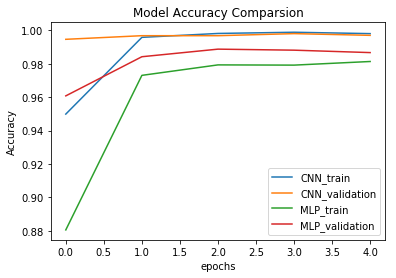

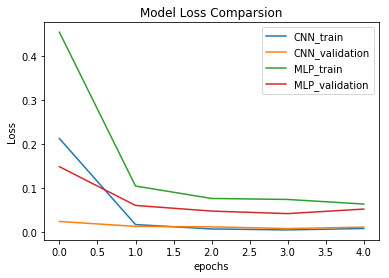

In [51]:
#  "Accuracy"
plt.plot(CNN.history['acc'])
plt.plot(CNN.history['val_acc'])
plt.plot(MLP.history['acc'])
plt.plot(MLP.history['val_acc'])

plt.title('Model Accuracy Comparsion')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['CNN_train', 'CNN_validation',
            'MLP_train', 'MLP_validation'], loc='lower right')
acc = plt.figure()

# "Loss"
plt.plot(CNN.history['loss'])
plt.plot(CNN.history['val_loss'])
plt.plot(MLP.history['loss'])
plt.plot(MLP.history['val_loss'])

plt.title('Model Loss Comparsion')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['CNN_train', 'CNN_validation',
            'MLP_train', 'MLP_validation'], loc='upper right')
loss = plt.figure()

loss.savefig()

In [20]:
### Use samples to test the model(CNN and MLP)

import pickle
MODEL_LABELS_FILENAME = "model_labels.dat"

with open(MODEL_LABELS_FILENAME, "rb") as f:
    lb = pickle.load(f)

model_CNN = load_model(MODEL_FILENAME_CNN)
model_MLP = load_model(MODEL_FILENAME_MLP)

# Grab some random CAPTCHA images to test against.
# In the real world, you'd replace this section with code to grab a real
# CAPTCHA image from a live website.
captcha_image_files = list(paths.list_images(CAPTCHA_IMAGE_FOLDER))
captcha_image_files = np.random.choice(captcha_image_files, size=(50,), replace=False)

# loop over the image paths
for image_file in captcha_image_files:
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.copyMakeBorder(image, 20, 20, 20, 20, cv2.BORDER_REPLICATE)
    thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if imutils.is_cv2() else contours[1]

    each_letter_region = []

    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        if w / h > 1.25:          
            half_w = int(w / 2)
            each_letter_region.append((x, y, half_w, h))
            each_letter_region.append((x + half_w, y, half_w, h))
        else:
            each_letter_region.append((x, y, w, h))
    if len(each_letter_region) != 4:
        continue
        
    each_letter_region = sorted(each_letter_region, key=lambda x: x[0])

    output_cnn= cv2.merge([image] * 3)
    output_mlp = cv2.merge([image] * 3)
    pred_cnn = []
    pred_mlp = []

    # loop over the letters
    for letter_box in each_letter_region:
        x, y, w, h = letter_box
        letter_image = image[y - 2:y + h + 2, x - 2:x + w + 2]

        letter_image = resize_image(letter_image, 25, 25)

        letter_image = np.expand_dims(letter_image, axis=2)
        letter_image = np.expand_dims(letter_image, axis=0)

        pred_cnn = model_CNN.predict(letter_image)
        pred_mlp = model_MLP.predict(letter_image)

        
        letter_cnn = lb.inverse_transform(pred_cnn)[0]
        pred_cnn.append(letter_cnn)
        
        letter_mlp = lb.inverse_transform(pred_mlp)[0]
        pred_mlp.append(letter_mlp)

        
        cv2.rectangle(output, (x - 5, y - 5), (x + w , y + h), (10, 100, 50), 1)
        cv2.putText(output, letter, (x , y - 8), cv2.FONT_HERSHEY_DUPLEX, 0.50, (10, 100, 50), 2)
        
        cv2.rectangle(output1, (x - 5, y - 5), (x + w , y + h), (10, 100, 50), 1)
        cv2.putText(output1, letter1, (x , y - 8), cv2.FONT_HERSHEY_DUPLEX, 0.50, (10, 100, 50), 2)

    
    captcha_text = "".join(pred_cnn)
    captcha_text = "".join(pred_mlp)
    print("CAPTCHA text is: {}".format(captcha_text))

    
    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.imshow('image', np.hstack([output_cnn,output_mlp]))   
    cv2.waitKey()

NameError: name 'CAPTCHA_IMAGE_FOLDER' is not defined